# Thyroid disease prediction simple ann


In [1]:
from PIL import Image
import cv2

The most common thyroid disorder is hypothyroidism. Hypo- means deficient or under(active), so hypothyroidism is a condition in which the thyroid gland is underperforming or producing too little thyroid hormone.. Recognizing the symptoms of hypothyroidism is extremely important.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("thyroid_data.csv")
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,0,41.0,1.0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,1
1,1,23.0,1.0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,1
2,2,46.0,0.0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,1
3,3,70.0,1.0,1,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,1
4,4,70.0,1.0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,1


In [6]:
data.tail()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
3766,3767,30.0,1.0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,1
3767,3768,68.0,1.0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,1
3768,3769,74.0,1.0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,1
3769,3770,72.0,0.0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,1
3770,3771,64.0,1.0,0,0,0,0,0,0,0,...,1,2.2000,1,99.000000,1,1.070,1,92.000000,0,1


In [9]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [10]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,1


In [11]:
data.shape

(3771, 28)

In [12]:
data.describe(include="all")

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,...,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.0,3771.000000
mean,51.628941,0.657385,0.123044,0.013259,0.011403,0.038982,0.014055,0.014055,0.015646,0.062053,...,0.796075,2.013503,0.938743,108.316778,0.897375,0.994964,0.897905,110.471364,0.0,0.922832
std,18.980472,0.474647,0.328532,0.114397,0.106187,0.193577,0.117732,0.117732,0.124117,0.241283,...,0.402967,0.738360,0.239833,34.500726,0.303509,0.185168,0.302813,31.359068,0.0,0.266893
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.050000,0.000000,2.000000,0.000000,0.250000,0.000000,2.000000,0.0,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.700000,1.000000,89.000000,1.000000,0.890000,1.000000,94.000000,0.0,1.000000
50%,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.013500,1.000000,106.000000,1.000000,0.995000,1.000000,110.000000,0.0,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.200000,1.000000,123.000000,1.000000,1.070000,1.000000,121.500000,0.0,1.000000
max,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.600000,1.000000,430.000000,1.000000,2.320000,1.000000,395.000000,0.0,1.000000


In [13]:
data.nunique()

age                           93
sex                            2
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
binaryClass                    2
dtype: int64

In [14]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'binaryClass'],
      dtype='object')

In [15]:
data.binaryClass.value_counts()

binaryClass
1    3480
0     291
Name: count, dtype: int64

In [16]:
data.binaryClass=data.binaryClass.map({"P":1,"N":0}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [17]:
data.sex.value_counts()

sex
1.0    2479
0.0    1292
Name: count, dtype: int64

In [18]:
data=data.replace({"?":np.NAN})

In [19]:
data.sex.value_counts()

sex
1.0    2479
0.0    1292
Name: count, dtype: int64

In [20]:
data.pregnant.value_counts()

pregnant
0    3718
1      53
Name: count, dtype: int64

In [21]:
data.pregnant=data.pregnant.replace({"f":0,"t":1})

In [22]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [23]:
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [24]:
data=data.replace({"t":1,"f":0})

In [25]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.0,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.0,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.0,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.0,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.0,1,0.870,1,70.000000,0,1


In [26]:
data["TBG"].value_counts()

KeyError: 'TBG'

In [27]:
data["referral source"].value_counts()

KeyError: 'referral source'

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3771 non-null   float64
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

In [29]:
data["T3 measured"].value_counts()

T3 measured
1    3002
0     769
Name: count, dtype: int64

In [30]:
data["TBG measured"].value_counts()

TBG measured
0    3771
Name: count, dtype: int64

In [31]:
data["on thyroxine"].value_counts()

on thyroxine
0    3307
1     464
Name: count, dtype: int64

In [32]:
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [33]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [36]:
columns=data.columns[data.dtypes.eq("object")]
data[columns]=data[columns].apply(pd.to_numeric,errors="coerce")

In [37]:
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [38]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

In [39]:
data.fillna(data.mean())

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1,2.5000,1,125.000000,1,1.140,1,109.000000,0,1
1,23.0,1.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,102.000000,0,0.995,0,110.469649,0,1
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0,2.0135,1,109.000000,1,0.910,1,120.000000,0,1
3,70.0,1.0,1,0,0,0,0,0,0,0,...,1,1.9000,1,175.000000,0,0.995,0,110.469649,0,1
4,70.0,1.0,0,0,0,0,0,0,0,0,...,1,1.2000,1,61.000000,1,0.870,1,70.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,30.0,1.0,0,0,0,0,0,0,0,0,...,0,2.0135,0,108.319345,0,0.995,0,110.469649,0,1
3767,68.0,1.0,0,0,0,0,0,0,0,0,...,1,2.1000,1,124.000000,1,1.080,1,114.000000,0,1
3768,74.0,1.0,0,0,0,0,0,0,0,0,...,1,1.8000,1,112.000000,1,1.070,1,105.000000,0,1
3769,72.0,0.0,0,0,0,0,0,0,0,0,...,1,2.0000,1,82.000000,1,0.940,1,87.000000,0,1


In [40]:
data.dtypes

age                          float64
sex                          float64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
TSH                          float64
T3 measured                    int64
T3                           float64
TT4 measured                   int64
TT4                          float64
T4U measured                   int64
T4U                          float64
FTI measured                   int64
FTI                          float64
TBG measured                   int64
b

In [41]:
data["age"].fillna(data["age"].mean(),inplace=True)

C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\3250616897.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(data["age"].mean(),inplace=True)


In [42]:
data.sex=data.sex.replace({"F":1,"M":0})

In [43]:
data["sex"].fillna(data["sex"].mode(),inplace=True)

C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\1558594319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["sex"].fillna(data["sex"].mode(),inplace=True)


In [44]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")

In [45]:
data["TSH"]=imputer.fit_transform(data[["TSH"]])
data["T3"]=imputer.fit_transform(data[["T3"]])
data["TT4"]=imputer.fit_transform(data[["TT4"]])
data["T4U"]=imputer.fit_transform(data[["T4U"]])
data["FTI"]=imputer.fit_transform(data[["FTI"]])

In [46]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
binaryClass                  0
dtype: int64

<Axes: >

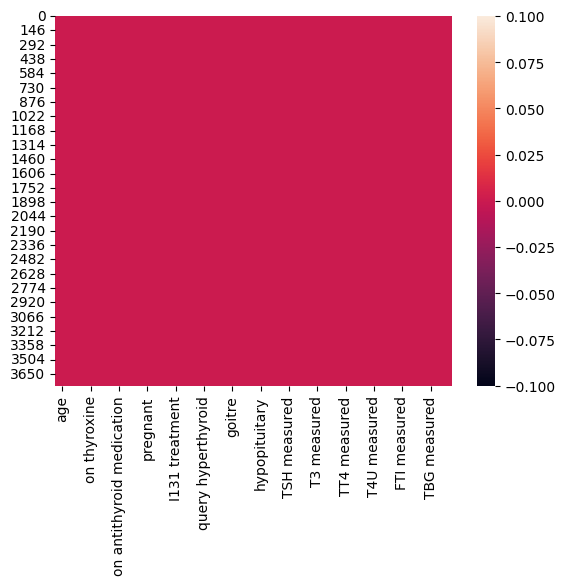

In [47]:
sns.heatmap(data.isnull())

(array([1292.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2479.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

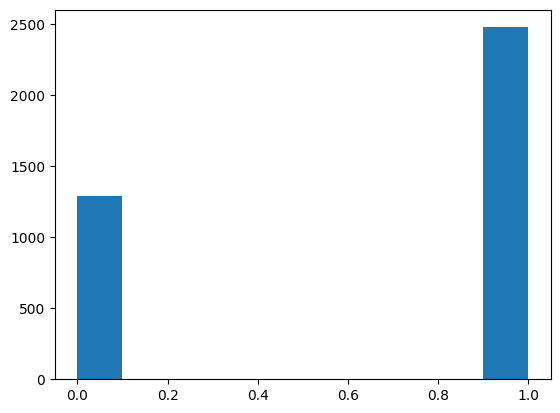

In [48]:
plt.hist(data.sex)

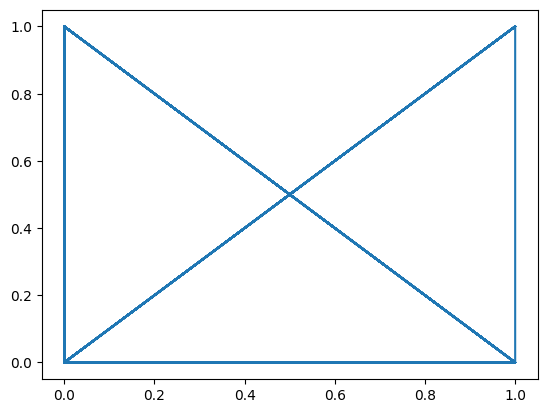

In [49]:
plt.plot(data["on thyroxine"],data["pregnant"])

C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\2784439929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


<Axes: xlabel='age', ylabel='Density'>

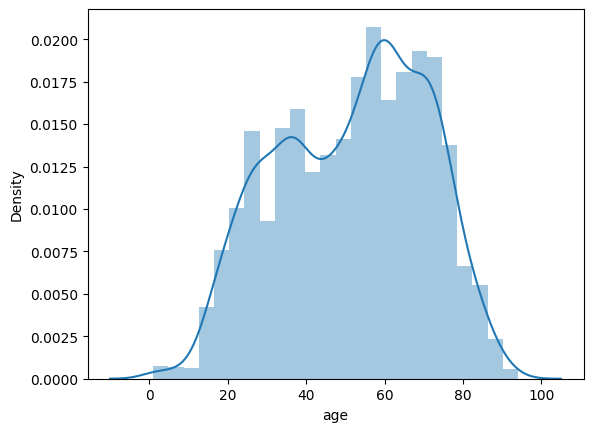

In [50]:
sns.distplot(data["age"])

C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\213618458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.sex)


<Axes: xlabel='sex', ylabel='Density'>

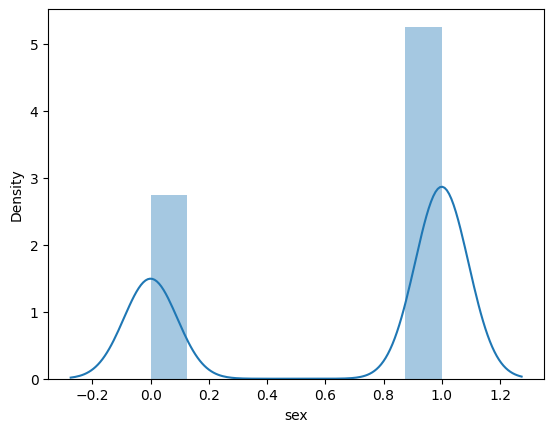

In [51]:
sns.distplot(data.sex)

C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\302326388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.T3)


<Axes: xlabel='T3', ylabel='Density'>

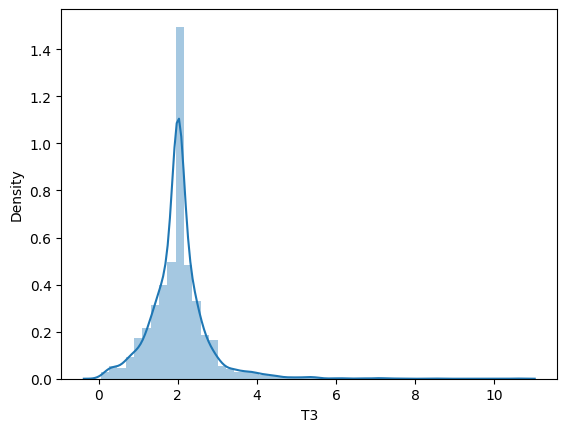

In [52]:
sns.distplot(data.T3)


C:\Users\prajw\AppData\Local\Temp\ipykernel_9036\147263787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['FTI'])


<Axes: xlabel='FTI', ylabel='Density'>

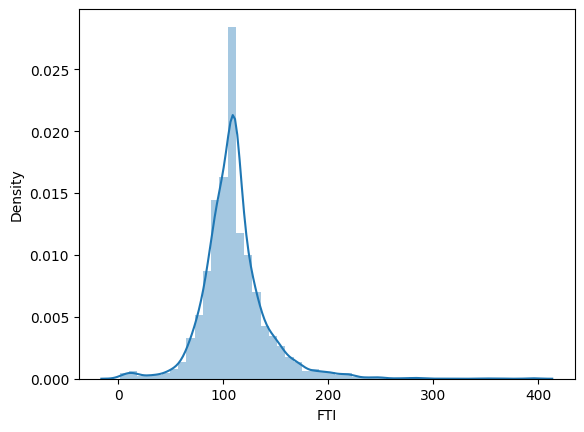

In [53]:
sns.distplot(data['FTI'])


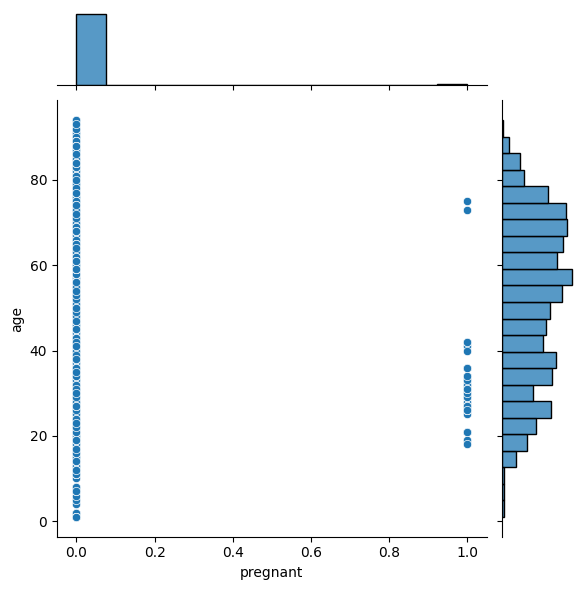

In [54]:
sns.jointplot(x="pregnant",y="age",data=data,kind="scatter")


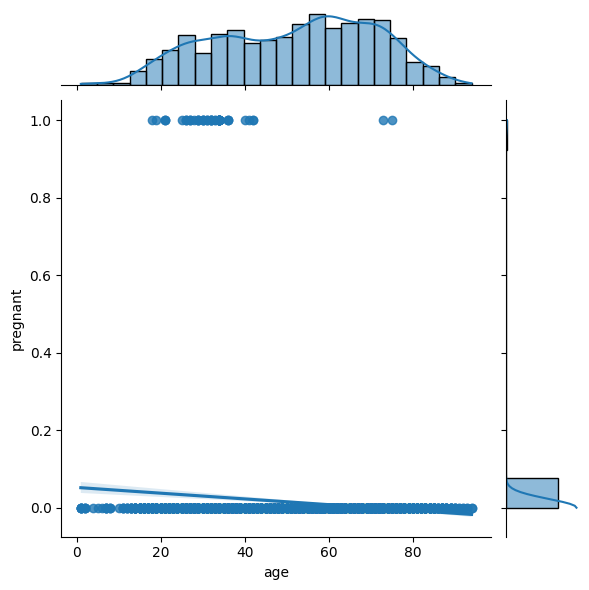

In [55]:
sns.jointplot(x="age",y="pregnant",data=data,kind="reg")


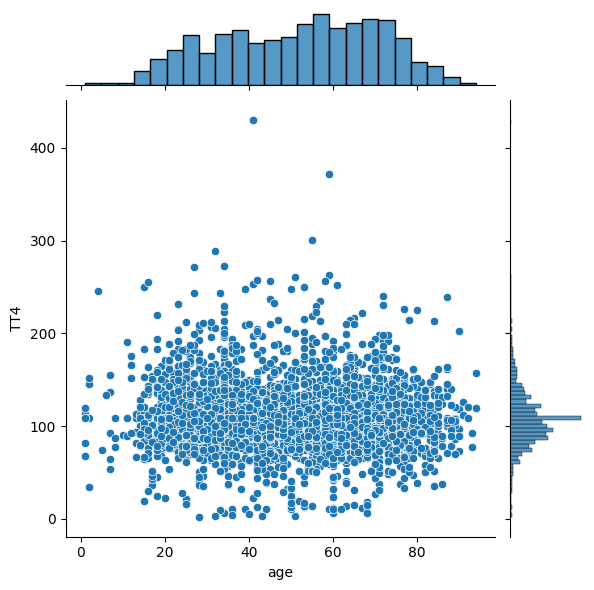

In [56]:
sns.jointplot(x="age",y="TT4",data=data,kind="scatter")


<Axes: xlabel='binaryClass', ylabel='count'>

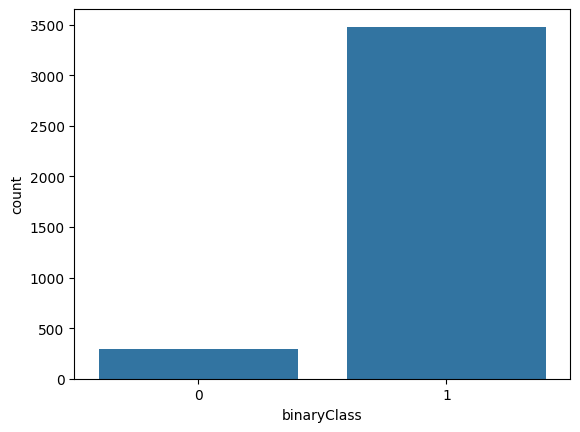

In [57]:
sns.countplot(x="binaryClass",data=data)


<Axes: xlabel='binaryClass', ylabel='count'>

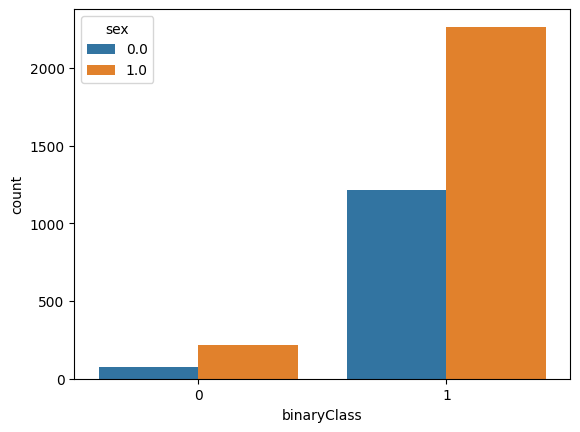

In [58]:
sns.countplot(x="binaryClass",hue="sex",data=data)


<Axes: xlabel='binaryClass', ylabel='age'>

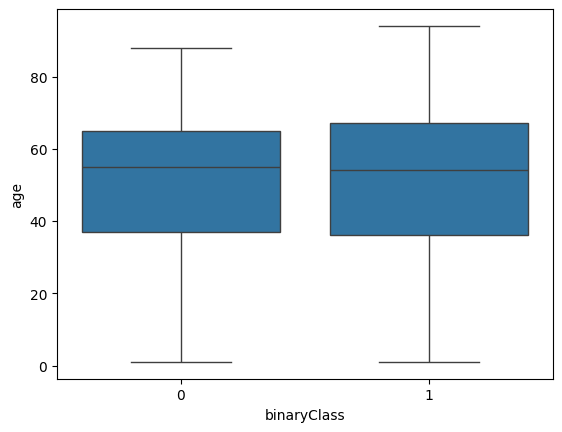

In [59]:
sns.boxplot(x="binaryClass",y="age",data=data)


In [60]:
data1=data[data.age<=(data.age.mean()+3*data.age.std())]
data1.shape

(3771, 28)

<Axes: xlabel='binaryClass', ylabel='age'>

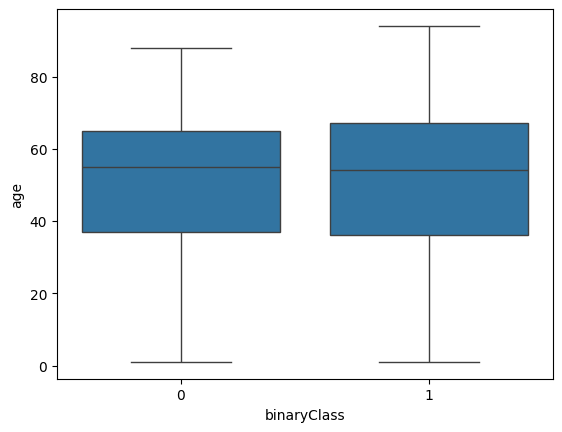

In [61]:
sns.boxplot(x="binaryClass",y="age",data=data1)

In [62]:
data1.corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,binaryClass
age,1.000000,0.007201,0.017522,-0.018257,-0.066994,0.085228,-0.119454,-0.030546,0.056481,0.043314,...,0.074516,-0.227328,0.069999,-0.041380,0.088424,-0.170811,0.087554,0.054091,NaN,0.001729
sex,0.007201,1.000000,0.098614,-0.038442,0.035431,-0.001835,0.076700,0.038727,0.014472,0.051353,...,-0.078314,0.055972,-0.063249,0.155830,-0.041598,0.219783,-0.042274,0.029194,NaN,-0.049627
on thyroxine,0.017522,0.098614,1.000000,0.005983,-0.002212,-0.042074,0.010140,0.037572,0.063362,0.094389,...,-0.145019,0.006483,0.024990,0.212835,0.038887,0.046445,0.038320,0.185732,NaN,0.081091
query on thyroxine,-0.018257,-0.038442,0.005983,1.000000,-0.012449,0.012588,0.045244,0.005855,-0.014614,-0.029816,...,-0.033395,-0.006466,0.029611,-0.004694,0.031561,0.000461,0.031431,-0.003556,NaN,0.007457
on antithyroid medication,-0.066994,0.035431,-0.002212,-0.012449,1.000000,-0.021630,0.072047,-0.012823,0.006586,-0.017271,...,0.010964,0.079212,-0.024642,0.023819,-0.029523,0.060390,-0.029779,-0.016609,NaN,0.021697
sick,0.085228,-0.001835,-0.042074,0.012588,-0.021630,1.000000,-0.024046,-0.000769,-0.025391,0.027704,...,0.006722,-0.076473,-0.005686,-0.036991,0.009417,-0.039033,0.009086,-0.021201,NaN,0.001764
pregnant,-0.119454,0.076700,0.010140,0.045244,0.072047,-0.024046,1.000000,-0.014255,-0.015052,-0.021372,...,0.026882,0.181146,0.021105,0.172501,0.032953,0.334750,0.032819,-0.016705,NaN,0.034526
thyroid surgery,-0.030546,0.038727,0.037572,0.005855,-0.012823,-0.000769,-0.014255,1.000000,0.003100,-0.012034,...,-0.023438,-0.024146,0.030499,-0.021798,0.010683,0.027948,0.010498,-0.031835,NaN,0.017642
I131 treatment,0.056481,0.014472,0.063362,-0.014614,0.006586,-0.025391,-0.015052,0.003100,1.000000,0.047288,...,0.000167,0.012056,0.032205,-0.008839,0.028552,0.009431,0.028397,-0.016824,NaN,-0.003580
query hypothyroid,0.043314,0.051353,0.094389,-0.029816,-0.017271,0.027704,-0.021372,-0.012034,0.047288,1.000000,...,-0.063515,-0.047498,0.024450,-0.008994,0.014540,0.013883,0.014123,-0.019734,NaN,-0.086264


<Axes: >

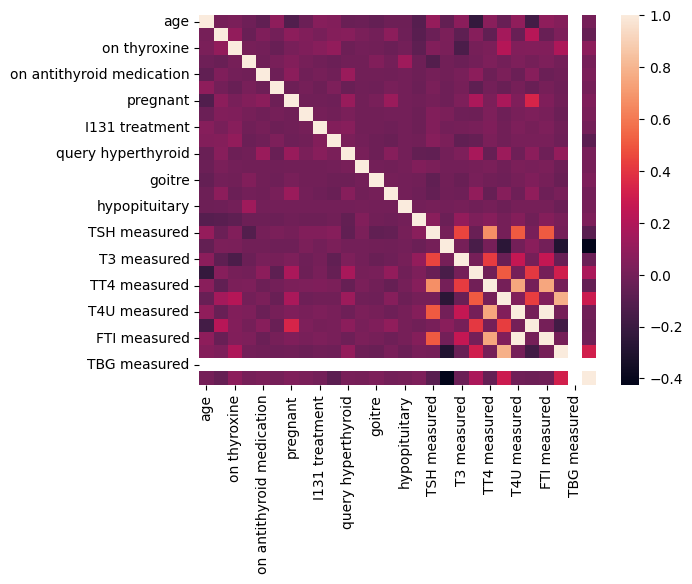

In [63]:
sns.heatmap(data1.corr())

In [64]:
x=data1.drop("binaryClass",axis=1)
y=data1.binaryClass

In [65]:
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured
0,41.0,1.0,0,0,0,0,0,0,0,0,...,1.300000,1,2.5000,1,125.000000,1,1.140,1,109.000000,0
1,23.0,1.0,0,0,0,0,0,0,0,0,...,4.100000,1,2.0000,1,102.000000,0,0.995,0,110.469649,0
2,46.0,0.0,0,0,0,0,0,0,0,0,...,0.980000,0,2.0135,1,109.000000,1,0.910,1,120.000000,0
3,70.0,1.0,1,0,0,0,0,0,0,0,...,0.160000,1,1.9000,1,175.000000,0,0.995,0,110.469649,0
4,70.0,1.0,0,0,0,0,0,0,0,0,...,0.720000,1,1.2000,1,61.000000,1,0.870,1,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,30.0,1.0,0,0,0,0,0,0,0,0,...,5.086766,0,2.0135,0,108.319345,0,0.995,0,110.469649,0
3767,68.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,2.1000,1,124.000000,1,1.080,1,114.000000,0
3768,74.0,1.0,0,0,0,0,0,0,0,0,...,5.100000,1,1.8000,1,112.000000,1,1.070,1,105.000000,0
3769,72.0,0.0,0,0,0,0,0,0,0,0,...,0.700000,1,2.0000,1,82.000000,1,0.940,1,87.000000,0


In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3771 non-null   float64
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

In [67]:
x.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
dtype: int64

In [68]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3766    1
3767    1
3768    1
3769    1
3770    1
Name: binaryClass, Length: 3771, dtype: int64

In [70]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.8 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/9.8 MB 8.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 11.5 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.8 MB 9.6 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.8 MB 9.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 8.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.8 MB 8.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 7.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.8 MB 7.2 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 6.9 MB/s eta 0:00:01
   ---------------

In [71]:
import statsmodels.api as sm
x=sm.add_constant(x)
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            binaryClass   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     48.50
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          2.74e-213
Time:                        11:04:41   Log-Likelihood:                 178.13
No. Observations:                3771   AIC:                            -302.3
Df Residuals:                    3744   BIC:                            -133.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9665      0.058     16.677      0.000       0.853       1.080
age                        3.114e-05      0.000      0.147      0.883      -0.000       0.000
sex                          -0.0316      0.008     -3.803      0.000      -0.048      -0.015
on thyroxine                  0.0530      0.012      4.339      0.000       0.029       0.077
query on thyroxine           -0.0370      0.034     -1.087      0.277      -0.104       0.030
on antithyroid medication     0.0475      0.036      1.316      0.188      -0.023       0.118
sick                          0.0134      0.020      0.679      0.497      -0.025       0.052
pregnant                      0.0569      0.035      1.643      0.100      -0.011       0.125
thyroid surgery               0.0964      0.032      2.988      0.003       0.033       0.160
I131 treatment                0.0079      0.031      0.256      0.798      -0.052       0.068
query hypothyroid            -0.0715      0.016     -4.501      0.000      -0.103      -0.040
query hyperthyroid           -0.0256      0.016     -1.585      0.113      -0.057       0.006
lithium                       0.0439      0.055      0.800      0.424      -0.064       0.152
goitre                        0.0688      0.040      1.713      0.087      -0.010       0.148
tumor                        -0.0326      0.024     -1.338      0.181      -0.080       0.015
hypopituitary                 0.2031      0.234      0.866      0.386      -0.256       0.663
psych                         0.0232      0.018      1.296      0.195      -0.012       0.058
TSH measured                 -0.1060      0.018     -5.802      0.000      -0.142      -0.070
TSH                          -0.0040      0.000    -22.858      0.000      -0.004      -0.004
T3 measured                   0.0196      0.011      1.782      0.075      -0.002       0.041
T3                            0.0215      0.006      3.332      0.001       0.009       0.034
TT4 measured                 -0.0190      0.029     -0.663      0.507      -0.075       0.037
TT4                           0.0016      0.000      3.640      0.000       0.001       0.002
T4U measured                 -0.1157      0.165     -0.701      0.483      -0.439       0.208
T4U                          -0.1618      0.055     -2.949      0.003      -0.269      -0.054
FTI measured                  0.1438      0.165      0.873      0.383      -0.179       0.467
FTI                        5.182e-05      0.000      0.116      0.908      -0.001       0.001
TBG measured                       0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2080.221   Durbin-Watson:                   2.009
Prob(Omnibu